# EDA TUTORIAL STUDENT COPY

## 1. Read CSV

### Import libraries and .CSV file

In [1]:
# ONLY if your Python Kernal does not have the relevant libraries installed
# For MacOS, use !pip3
# For Windows, use !pip or %pip

# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib.pyplot
# !pip3 install seaborn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Connect to your Netflix_Userbase.csv file on your Desktop / location you have saved the file at
df = pd.read_csv('/Users/celestinesheum/Downloads/Netflix_Userbase.csv')

### Preliminary checks on Dataframe

In [4]:
## Check the first 5 rows
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [6]:
## Check the last 10 rows (default .tail() without value inside will return last 5 rows)
df.tail(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2490,2491,Premium,13,18-07-22,11-07-23,France,41,Female,Smartphone,1 Month
2491,2492,Basic,14,19-07-22,12-07-23,Brazil,29,Female,Laptop,1 Month
2492,2493,Standard,11,20-07-22,11-07-23,Mexico,33,Male,Smart TV,1 Month
2493,2494,Premium,12,21-07-22,15-07-23,Spain,36,Male,Smart TV,1 Month
2494,2495,Basic,15,23-07-22,12-07-23,Italy,43,Female,Laptop,1 Month
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [7]:
## Check what columns are in DataFrame (useful for large datasets with too many columns)
print(df.columns)

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')


## 2. Read Data

In [8]:
## To see what types of subscriptions are available
print(df['Subscription Type'].unique())

['Basic' 'Premium' 'Standard']


In [9]:
## Monthly subscription? Yearly? 
print(df['Plan Duration'].unique())

['1 Month']


In [10]:
## To see different subscription prices
print(df['Monthly Revenue'].unique())

[10 15 12 13 11 14]


In [11]:
## Which countries are we looking at?
print(df['Country'].unique())

['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']


In [12]:
# Check what type of values are stored in the Dataframe columns
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [13]:
# Number of rows VS columns
df.shape

(2500, 10)

In [15]:
# Set the display options
pd.options.display.float_format = '{:.3f}'.format # 3dp only

## Utilise the built-in statistics tool .describe()
df.describe()

,User ID,Monthly Revenue,Age
count,2500.000,2500.000,2500.000
mean,1250.500,12.508,38.796
std,721.832,1.687,7.172
min,1.000,10.000,26.000
25%,625.750,11.000,32.000
50%,1250.500,12.000,39.000
75%,1875.250,14.000,45.000
max,2500.000,15.000,51.000


## 3. Clean Data

In [16]:
## Check for null values i.e. empty cells in each column
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [17]:
# Check the number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 10)


So we have no null or duplicated data!

### Reformatting the columns in our DataFrame

In [18]:
# Check first 5 rows (for before/after comparison)
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [20]:
# Convert ['... Date'] into YYYY-MM-DD format -> More uniform data -> Easier plotting -> Better analysis
## Utilise the .to_datetime() function to format 'Join Date' & 'Last Payment Date' into YYYY-MM-DD datetime value
df['Join Date'] = pd.to_datetime(df['Join Date'], format = '%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format = '%d-%m-%y')

# The 'format' argument shows how to intepret the date strings we provided
# Pandas always stores the date internally as YYYY-MM-DD once date is stored as datetimelike value

In [21]:
# Check Dataframe if 'Join Date' and 'Last Payment Date' columns were reformatted
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


## 4. Visualise Data

### 4a. Sales per Month

In [23]:
## Create a 'Payment Year-Month' column from 'Last Payment Date' column
df['Payment Year-Month'] = df['Last Payment Date'].dt.to_period('M').astype(str)    # .dt.to_period('M') : show format until month
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Payment Year-Month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2023-06
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2023-06
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-06
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2023-06
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-06


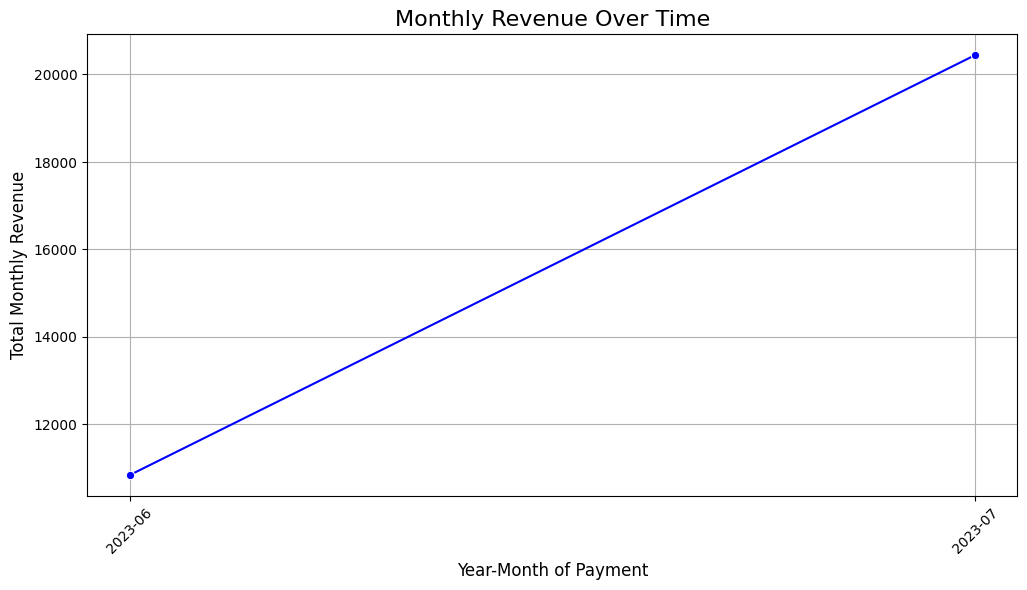

In [25]:
## Group by 'Payment Year-Month' and sum the revenue
monthly_revenue = df.groupby('Payment Year-Month')['Monthly Revenue'].sum().reset_index()

## Convert 'Payment Year-Month' back to string for plotting purposes
monthly_revenue['Payment Year-Month'] = monthly_revenue['Payment Year-Month'].astype(str)

# Plotting the line chart for revenue over time
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Payment Year-Month', y = 'Monthly Revenue', data = monthly_revenue, marker = 'o', color = 'b')
plt.title('Monthly Revenue Over Time', fontsize = 16)
plt.xlabel('Year-Month of Payment', fontsize = 12)
plt.ylabel('Total Monthly Revenue', fontsize = 12)
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [26]:
## Create a 'Join Year-Month' column from 'Join Date' column
df['Join Year-Month'] = df['Join Date'].dt.to_period('M').astype(str)
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Payment Year-Month,Join Year-Month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2023-06,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2023-06,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-06,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2023-06,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-06,2023-05


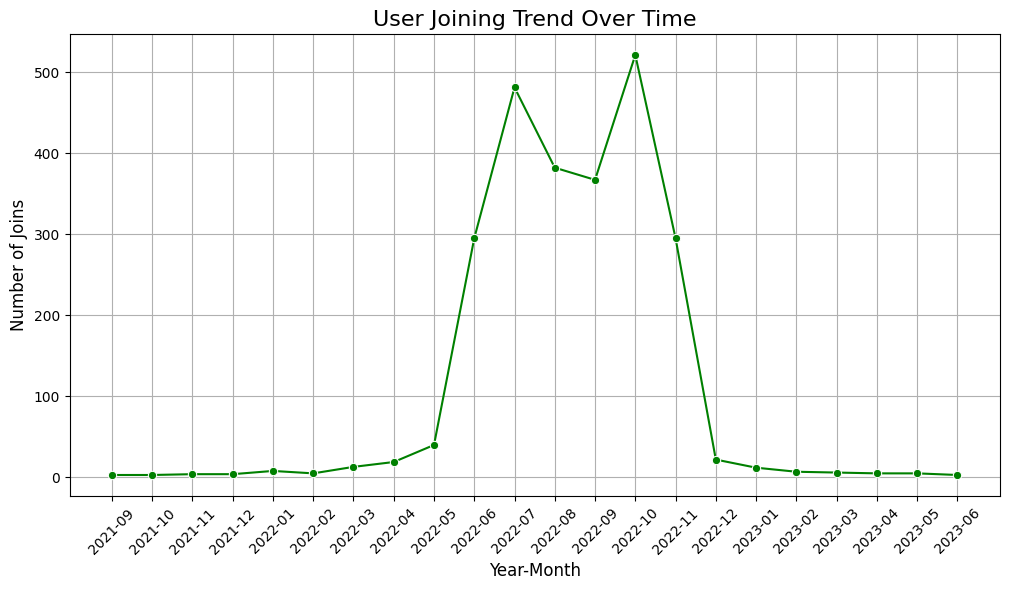

In [28]:
## Group by 'Join Year-Month' and count the number of joins
monthly_joins = df.groupby('Join Year-Month').size().reset_index(name = 'Number of Joins')

# Convert 'Join Year-Month' back to string for plotting purposes
monthly_joins['Join Year-Month'] = monthly_joins['Join Year-Month'].astype(str)

# Plotting the Line Chart for User Joins over time
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Join Year-Month', y = 'Number of Joins', data = monthly_joins, marker = 'o', color = 'g')

# Set the labels
plt.title('User Joining Trend Over Time', fontsize = 16)
plt.xlabel('Year-Month', fontsize = 12)
plt.ylabel('Number of Joins', fontsize = 12)
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


### 4b. Most Popular Subscription Type

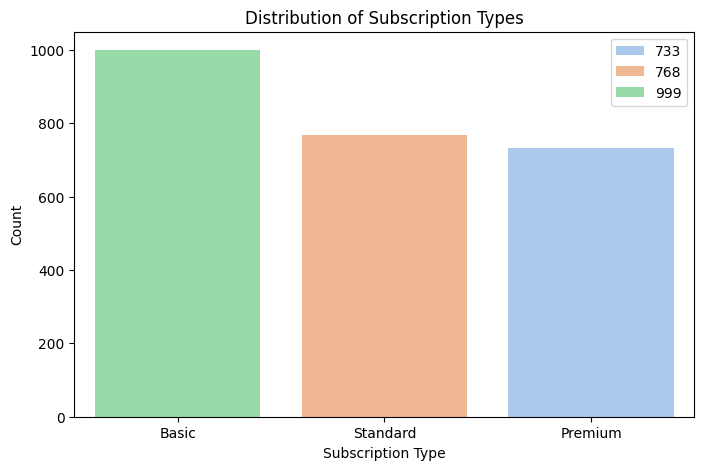

In [30]:
## Count of each Subscription Type
subscription_counts = df['Subscription Type'].value_counts()

# Bar Plot of the distribution
plt.figure(figsize = (8,5))
sns.barplot(x = subscription_counts.index, y = subscription_counts.values, hue = subscription_counts.values, palette = "pastel")
# You may exclude the hue field, seaborn will auto assign your x variable to be your hue

# Set the labels
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

### 4c. Gender vs Subscription Type
Which Gender prefers which Subscription -> How can we market our product towards the specific Gender?

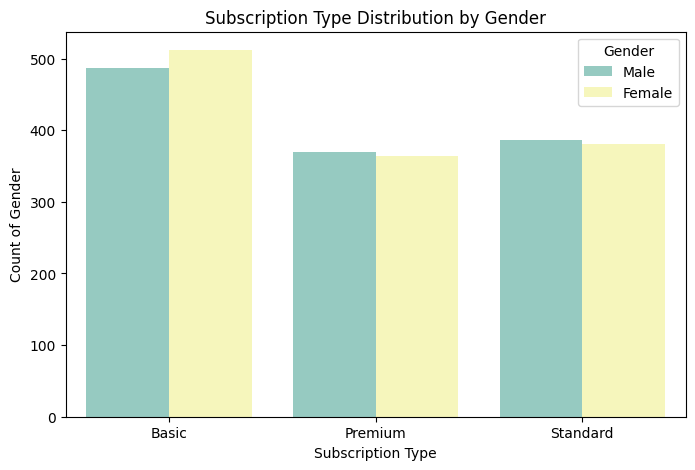

In [32]:
## Count Plot of Subscription Type by Gender
plt.figure(figsize = (8,5))
sns.countplot(x = 'Subscription Type', hue = 'Gender', data = df, palette = 'Set3')

# Set the labels
plt.title('Subscription Type Distribution by Gender')
plt.xlabel('Subscription Type')
plt.ylabel('Count of Gender')
plt.show()


### 4d. Which Country uses Netflix more?

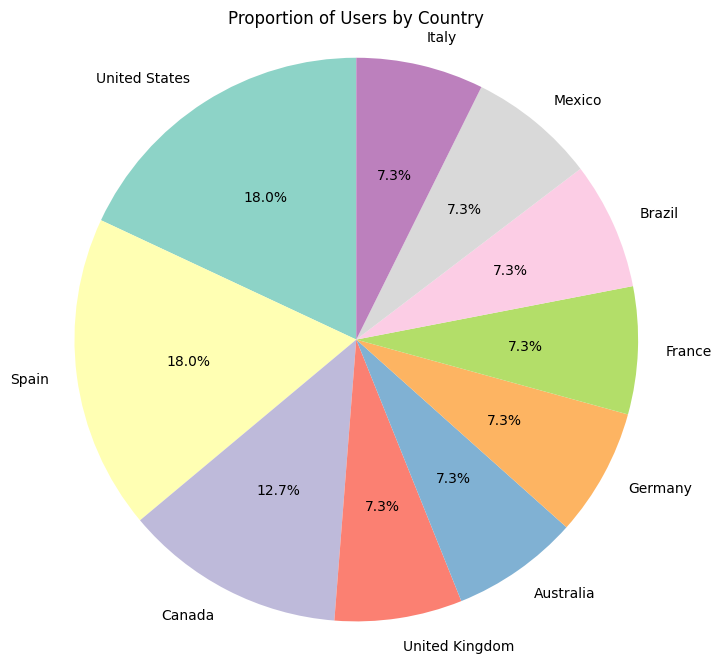

In [33]:
## Count the number of users per Country
country_counts = df['Country'].value_counts()

# Plot the Pie chart
plt.figure(figsize = (8,8))
plt.pie(country_counts, labels = country_counts.index, autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette("Set3", len(country_counts)))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Users by Country')
plt.axis('equal')  
plt.show()


### 4d. Alternative Visualisation

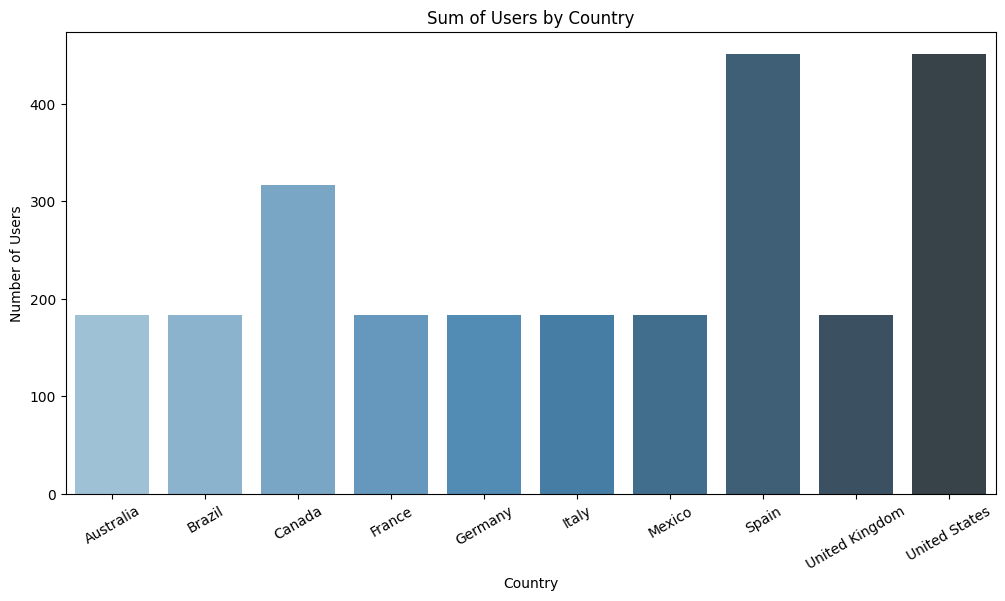

In [34]:
# Create a variable 'sum_users_by_country', grouping them by their 'Country' label, and counting the no. of User IDs
sum_users_by_country = df.groupby('Country')['User ID'].count().reset_index()
sum_users_by_country.rename(columns = {'User ID': 'User Count'}, inplace = True)

# Plot the bar graph
plt.figure(figsize = (12,6))
sns.barplot(x = 'Country', y = 'User Count', data = sum_users_by_country, hue = 'Country', palette = 'Blues_d')

# Set the labels
plt.title('Sum of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=30) # Rotate the labels by 30 degrees
plt.show()

## 5. Additional Analysis: How much did we earn in Revenue?

### Recall: What does our df DataFrame look like?

In [35]:
## Show first 5 rows of DataFrame
df.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Payment Year-Month,Join Year-Month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2023-06,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2023-06,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-06,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2023-06,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-06,2023-05


### 5a. How much is our Total Revenue?

In [36]:
# Assuming df is your DataFrame containing the relevant data
total_revenue = df['Monthly Revenue'].sum()

# Print Total Revenue to 2 decimal places
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $31271.00


### 5b. How much is our Monthly Revenue?

In [37]:
# Group by 'Payment Year-Month' and sum the Revenue
monthly_revenue = df.groupby('Payment Year-Month')['Monthly Revenue'].sum().reset_index()

# Display the Monthly Revenue
print(monthly_revenue)

  Payment Year-Month  Monthly Revenue
0            2023-06            10829
1            2023-07            20442


### 5c. Revenue per Subscription Pricing Tier
Display in (1) a Text Table, or (2) a Bar Plot

#### Method 1: Text Table

In [38]:
# Create a variable called 'revenues', and utilise the functions .value_counts()
revenues = df['Monthly Revenue'].value_counts().reset_index()

# Call the function directly
revenues

,Monthly Revenue,count
0,12,455
1,14,431
2,13,418
3,10,409
4,15,399
5,11,388


#### Method 2: Bar Plot

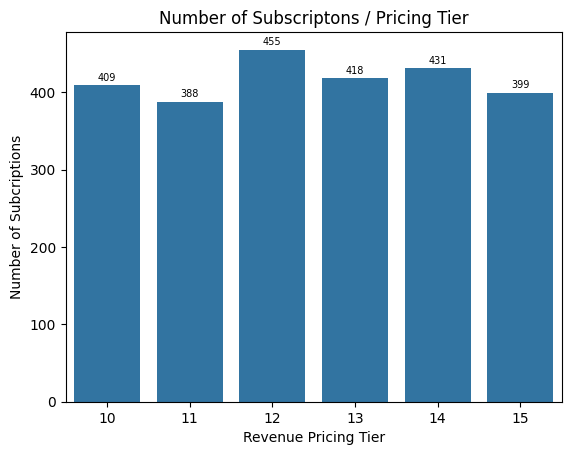

In [39]:
# Set up a Bar Plot using Seaborn
sns.barplot(
    x = 'Monthly Revenue',  # Utilising the Column 'Monthly Revenue'
    y = 'count',    # Kernals running Python 3.11 might throw an error here; switch to Python 3.9.6 or Python 3.12
    data = revenues
)

barplot = sns.barplot()

# Set the labels
plt.xlabel('Revenue Pricing Tier')
plt.ylabel('Number of Subcriptions')
plt.title('Number of Subscriptons / Pricing Tier')

# Add the exact total count above each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',  # Annotate with the height value
                     (p.get_x() + p.get_width()/2., p.get_height()),  # Position on top of the bar
                     ha = 'center', va = 'bottom',  # Center the text horizontally and place it just above the bar
                     fontsize = 7, color = 'black',  # Set font size and color
                     xytext = (0, 2),  # Offset the text slightly above the bar
                     textcoords = 'offset points')

plt.show()

### Alternative to 5b. Monthly Revenue (Comment In/Out)

In [40]:
# # Ensure 'Last Payment Date' is in datetime format
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# # Create a new column for Year-Month (YYYY-MM)
df['Year-Month'] = df['Last Payment Date'].dt.to_period('M')

# # Group by 'Year-Month' and sum the revenue
monthly_revenue = df.groupby('Year-Month')['Monthly Revenue'].sum().reset_index()

# # Display the monthly revenue
print(monthly_revenue)

  Year-Month  Monthly Revenue
0    2023-06            10829
1    2023-07            20442
